In [2]:
# 합성곱 신경망
# MNIST 숫자 이미지 분류에 CNN 사용
# (image_height, image_width, image_channels) 크기의 입력 텐서를 사용
# 첫 번째 입력층의 매개변수로 input_shape=(28, 28, 1) 전달
import tensorflow.keras
tensorflow.keras.__version__

'2.4.0'

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# 데이터 로딩
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
# 케라스에서 처리할 수 있는 형태로 변환  샘플개수 × 가로 × 세로 × 차원
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255
# 원핫인코딩
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model=models.Sequential() # 모델 생성
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
# convolution layer, 필터 개수 32, 필터 크기 3×3, 입력 데이터 28×28×1 (흑백 이미지1, 컬러이미지3)
model.add(layers.MaxPooling2D(2,2)) # 맥스풀링 필터 크기 2×2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten()) # fully connected layer로 변환(완전 연결층)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 출력층 10개의 숫자로 분류

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(train_images,train_labels,epochs=5) # 모델 학습

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3320 - accuracy: 0.8939
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0297 - accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0179 - accuracy: 0.9946


In [6]:
# 검증용 데이터로 모델의 성능 평가
test_loss, test_acc=model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9924


In [7]:
test_acc

0.9923999905586243

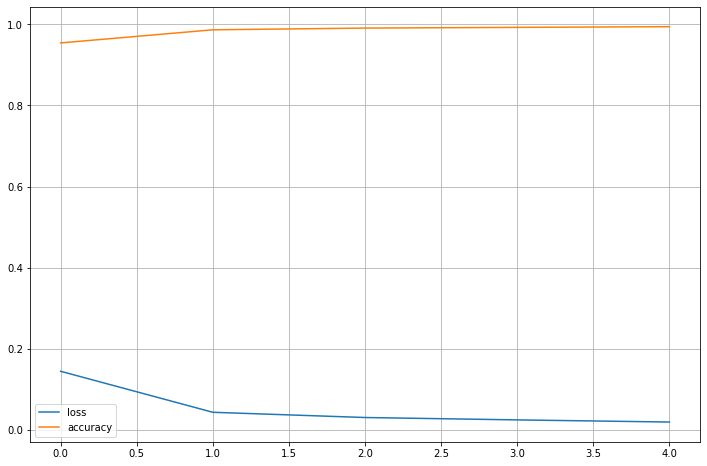

In [8]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [9]:
model.save('d:/data/mnist')

INFO:tensorflow:Assets written to: d:/data/mnist\assets
